# Import libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
# To display the maximum rows and columns
pd.set_option("Display.max_rows", None)
pd.set_option("Display.max_columns", None)

In [29]:
# To create a DataFrame through pandas
df = pd.read_csv("AutoInsurance.csv")

In [30]:
# Shape of the dataset (number of rows & columns)
print("The number of rows: ",df.shape[0])
print("The number of columns: ",df.shape[1])

The number of rows:  9134
The number of columns:  24


# Checking Null values

In [31]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Column '{col}' has {df[col].isnull().sum()} null values.")
    
print("Data is cleaned")

Data is cleaned


# Checking Duplicate records

In [32]:
# Check for the duplicates records in DataFrame
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Duplicates record found: ")
    print(duplicates)
    
    # Drop duplicates record
    df.drop_duplicates(inplace=True)
    print("DataFrame after droping duplicates")
    print(df)
    
else:
    print("No Duplicate records found")

No Duplicate records found


In [33]:
# To display the records in the dataset from the top
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4          3/2/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

# Checking datatypes for each features

In [34]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

# Checking the outliers

In [35]:
numerical_cols = df.select_dtypes(include=["float64","int64"])

for col in numerical_cols:
    Q1 = numerical_cols[col].quantile(0.25)
    Q3 = numerical_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = numerical_cols[(numerical_cols[col] < Q1 - 1.5 * IQR) | (numerical_cols[col] > Q3 + 1.5 * IQR)]
    if not outliers.empty:
        print(f"outliers fount in {col} : ", outliers.shape[0])

# To print the shape of the dataset before removing the outliers
print("")
print("Number of rows and columns : ",numerical_cols.shape)

outliers fount in Customer Lifetime Value :  817
outliers fount in Monthly Premium Auto :  430
outliers fount in Number of Open Complaints :  1882
outliers fount in Number of Policies :  416
outliers fount in Total Claim Amount :  453

Number of rows and columns :  (9134, 8)


# Handling the outliers

In [36]:
for col in numerical_cols:
    Q1 = numerical_cols[col].quantile(0.25)
    Q3 = numerical_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    numerical_cols = numerical_cols[(numerical_cols[col] >= lower_bound) & (numerical_cols[col] <= upper_bound)]
    
# To print the shape of the dataset after removing the outliers
print("")
print(f"Their are {numerical_cols.shape[0]} number of rows and {numerical_cols.shape[1]} columns after removing the outliers.")


Their are 5888 number of rows and 8 columns after removing the outliers.


In [37]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [38]:
numerical_cols.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [39]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

# Summary Statistics of Numerical features

In [40]:
numerical_cols.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Total Claim Amount  
count         9134.000000  
mean           434.088794  
std            290.500092  
min              0.099007  
25%            272.258244  
50%            383.945434  
75%            547.514839  
max           2893.239678

# Exploratory Data Analysis(EDA):

# Univariate Analysis

## Employment Status

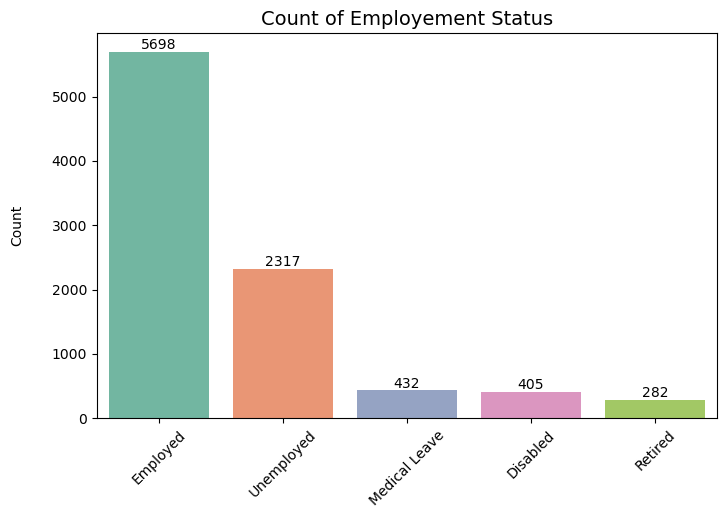

In [41]:
# To determine figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="EmploymentStatus", palette='Set2')
plt.title("Count of Employement Status", fontsize=14)
plt.ylabel('Count', labelpad=20, fontsize=10)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel('')

# Policy Name

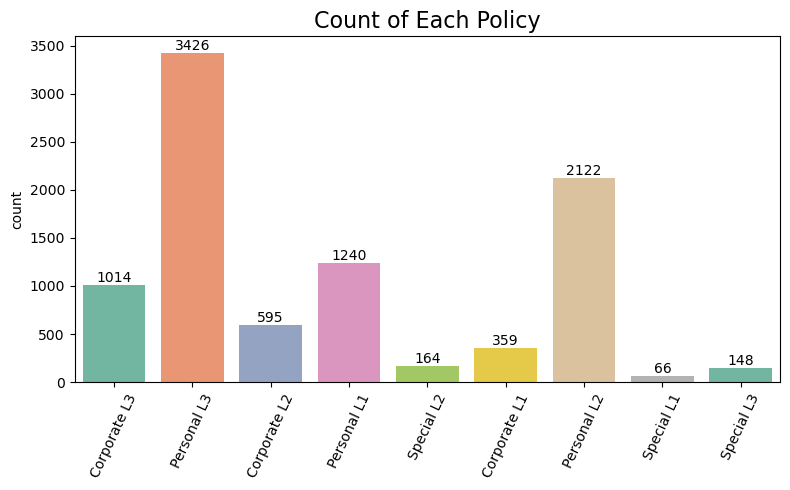

In [42]:
# To determine figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Policy", palette="Set2")
plt.title("Count of Each Policy", fontsize=16)
plt.xticks(rotation=65)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

# Gender

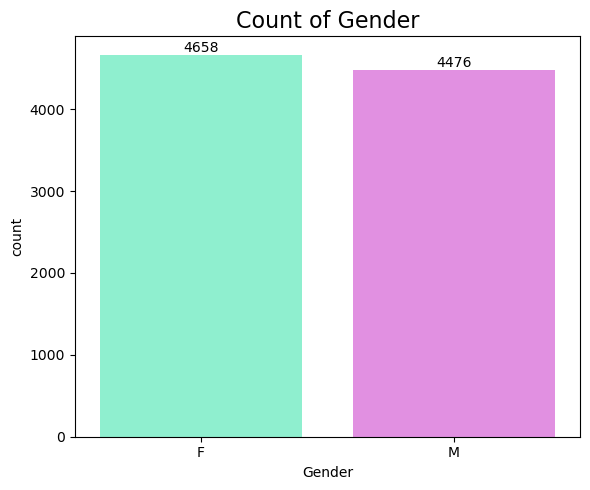

In [43]:
# To determine figure size
fig, ax = plt.subplots(figsize=(6,5))

# To create a countplot
sns.countplot(df, x="Gender", palette=['aquamarine','violet'])
plt.title("Count of Gender", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

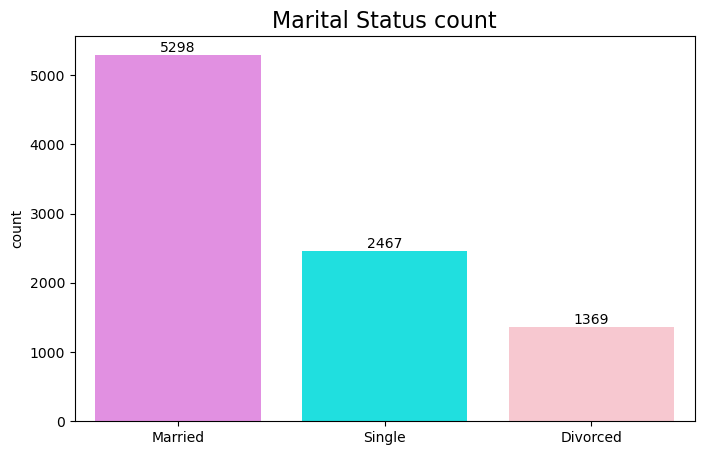

In [44]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Marital Status", palette=["violet","cyan","pink"])
plt.title("Marital Status count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Policy Type

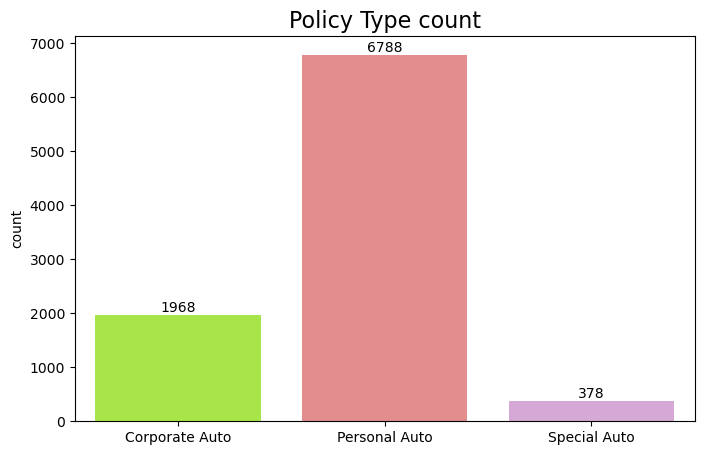

In [45]:
# To determine figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Policy Type", palette=["greenyellow","lightcoral","plum"])
plt.title("Policy Type count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Vehicle Size

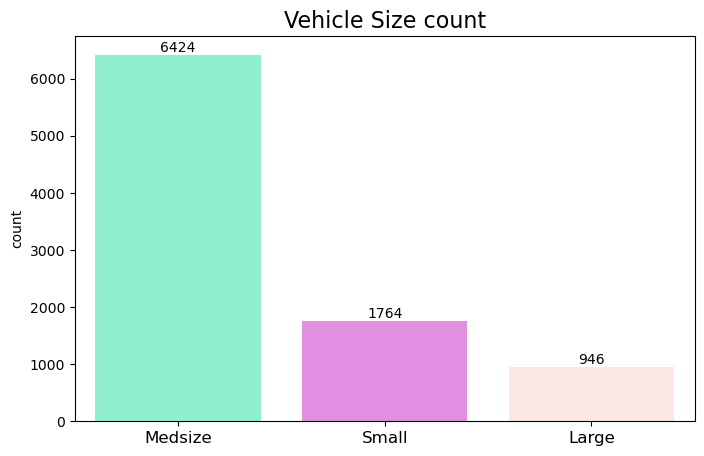

In [46]:
# To determine a figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Vehicle Size", palette=["aquamarine", "violet", "mistyrose"])
plt.xticks(fontsize=12)
plt.title("Vehicle Size count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Vehicle Class

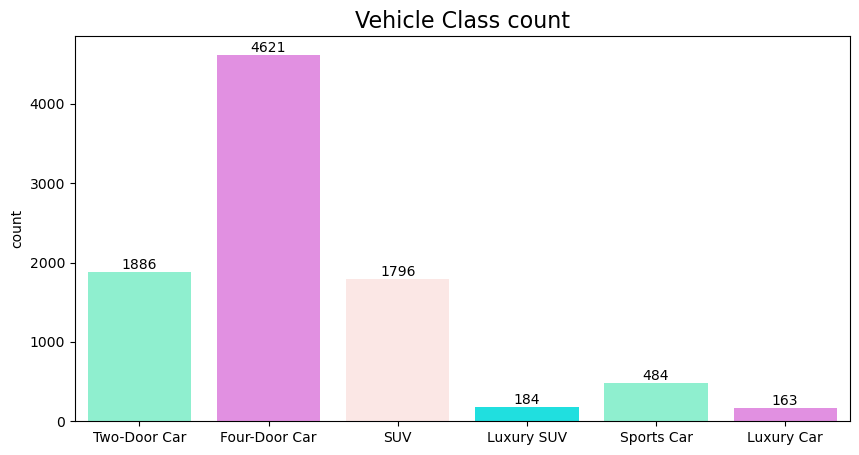

In [47]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(10,5))

# To create a countplot
sns.countplot(df, x="Vehicle Class", palette=["aquamarine", "violet", "mistyrose", "cyan"])
plt.title("Vehicle Class count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# State

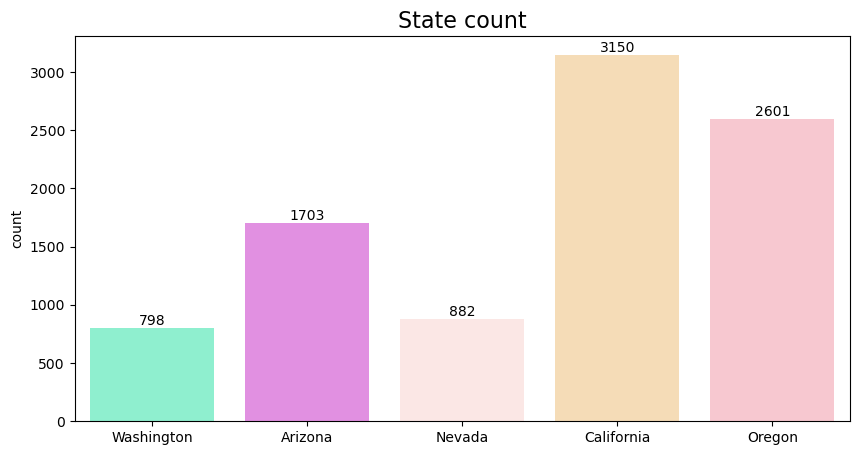

In [48]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(10,5))

# To create a countplot
sns.countplot(df, x="State", palette=["aquamarine","violet","mistyrose","navajowhite","pink"])
plt.title("State count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Location

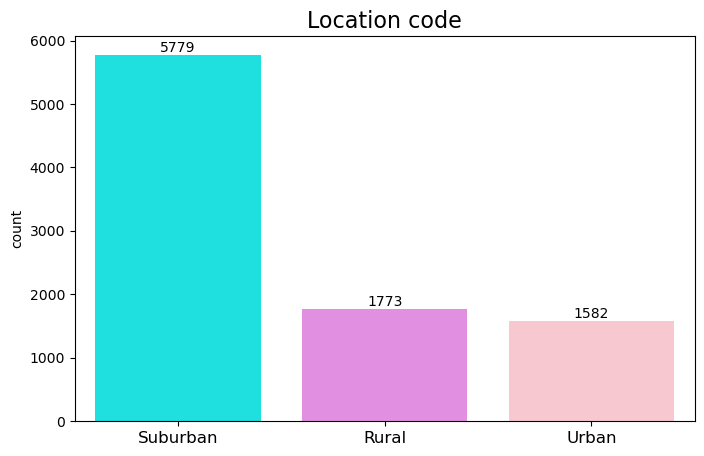

In [49]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Location Code", palette=["cyan","violet","pink"])
plt.title("Location code", fontsize=16)
plt.xticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Coverage

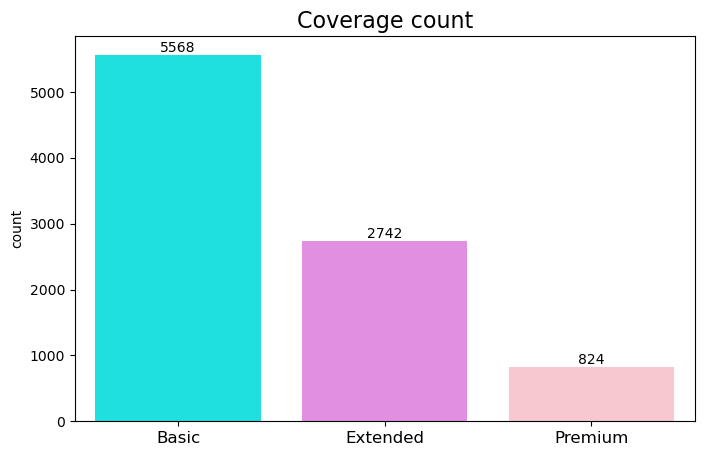

In [50]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Coverage", palette=["cyan","violet","pink"])
plt.title("Coverage count", fontsize=16)
plt.xticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

Distribution plot of the CLV (Customer Lifetime Value) variable. The distribution is highly skewed to the right, meaning that the majority of customers have a low CLV, while a small number of customers have a very high CLV

In [51]:
df["Customer Lifetime Value"].skew()

3.0322802599299847

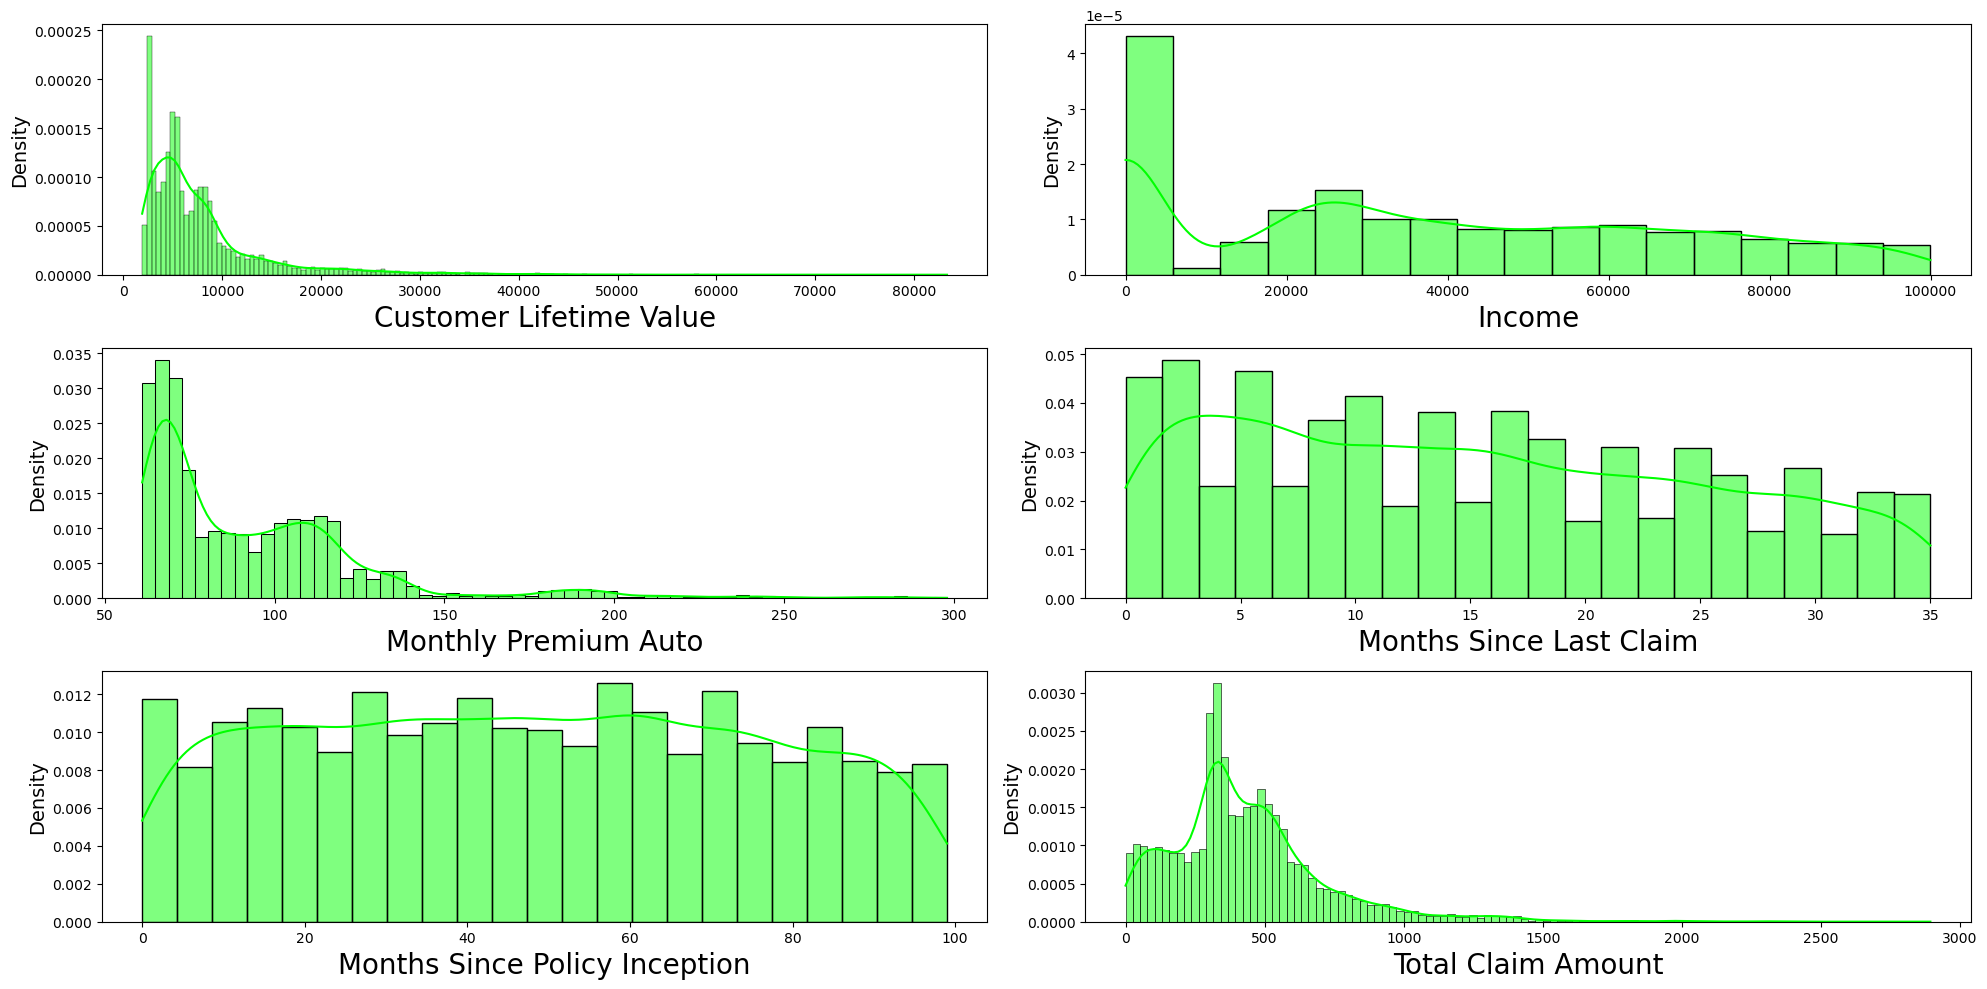

In [52]:
numerical_cols = df.select_dtypes(include=["float64", "int64"])
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"], axis=1)

# To determine the figure size
plt.figure(figsize=(20,10))

# To create a histogram plot for all the numerical features
for count,i in enumerate(numerical_cols):
    plt.subplot(3,2,count+1)
    sns.histplot(numerical_cols, x=i, kde=True, stat='density', color='lime')
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Density', fontsize=14)
plt.tight_layout()
plt.show()

The distribution of 6 numerical features:

* **Customer Lifetime Value:** This distribution is right skewed, meaning there are more customers with a lower lifetime value and few customers with a higher lifetime value.

* **Income:** This distribution is also right skewed, meaning there are more customers with lower income and few customers with higher income.

* **Monthly Premium Auto:** This distribution is also right skewed, meaning there are more customers with a lower monthly premium and few customers with higher monthly premium.

* **Months Since Last Claim:** This distribution is slightly right skewed, meaning there are more customers who have filed a claim recently and few customers who have not filed a claim for a long time.

* **Months Since Policy Inception:** This distribution is uniform with a slight peak around 10 and 60 months. 

* **Total Claim Amount:** This distribution is also right skewed, meaning there are more customers with lower claim amount and few customers with a higher claim amount.


# Boxplot of numerical features

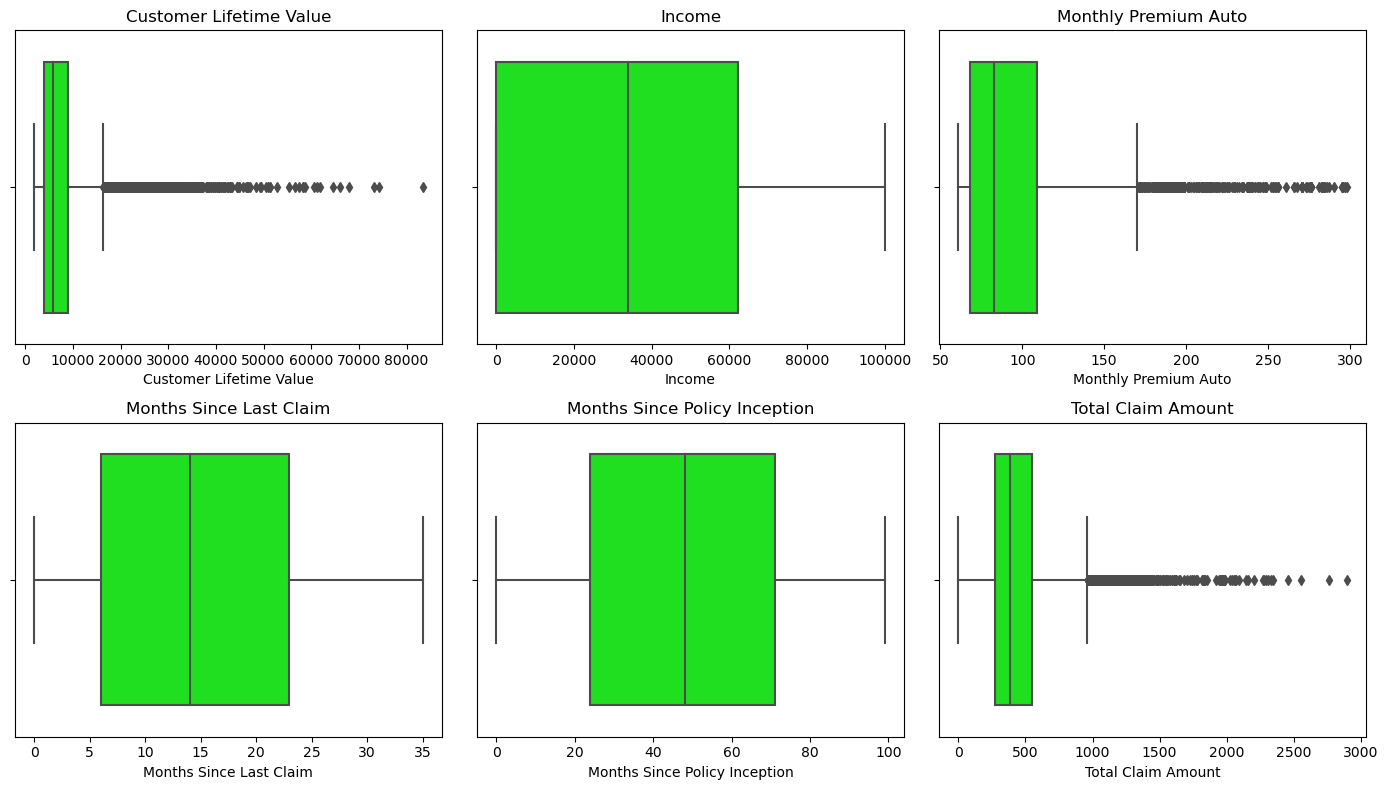

In [53]:
# To determine the subplots and figure size
fig, axes = plt.subplots(2,3, figsize=(14,8))
axes = axes.flatten()

# To create a Boxplot for all the numerical features.
for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(x=numerical_cols[col], ax=axes[i], color="lime")
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

From the above boxplots we can observe the outliers in ["Customer Lifetime Value" , "Monthly Premium Auto", "Total Claim Amount"]

# Pie-Chart

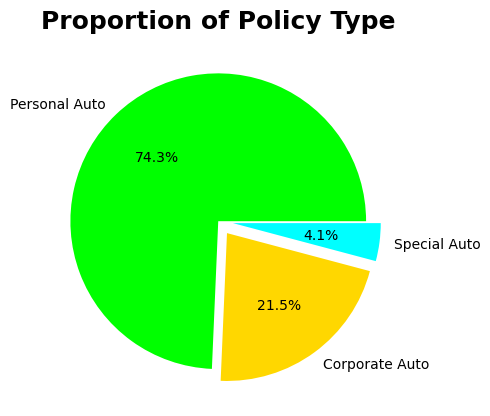

In [54]:
# To determine the value counts of categorical data
category_counts = df['Policy Type'].value_counts()

color = ["lime","gold","cyan"]
explode = [0,0.1,0.1]

# To create a pie-chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=color, explode = explode)
plt.title('Proportion of Policy Type', fontsize=18, fontweight='bold')
plt.show()

# Pie-Chart

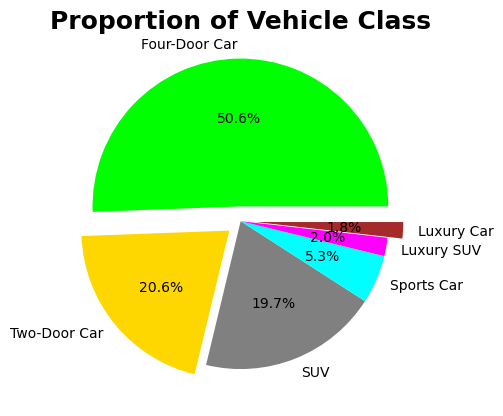

In [55]:
# To determine the value counts of categorical data
category_counts = df['Vehicle Class'].value_counts()

color = ["lime","gold","grey","cyan","magenta","brown"]
explode = [0.1,0.1,0,0,0,0.1]

# To create a pie-chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=color, explode=explode)
plt.title('Proportion of Vehicle Class', fontsize=18, fontweight='bold')
plt.show()

# Bivariate Analysis

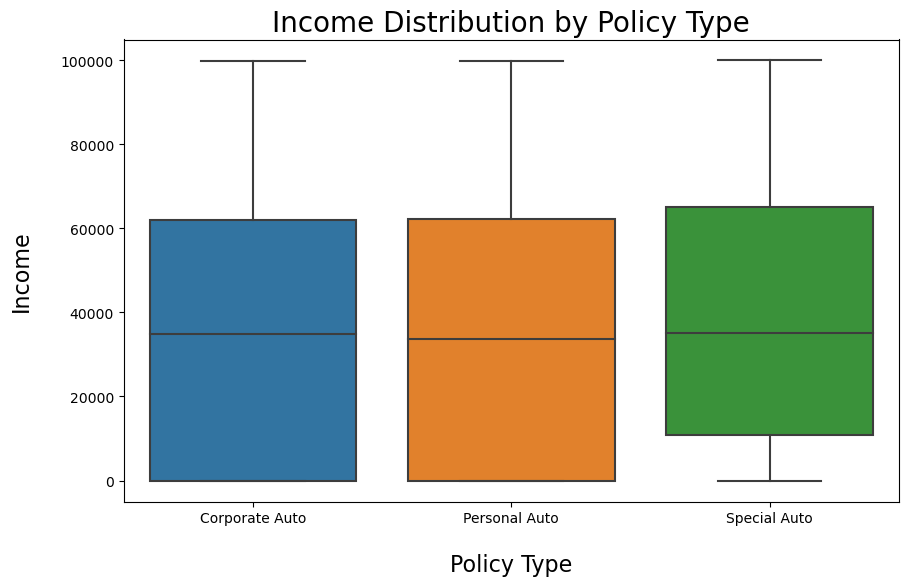

In [56]:
# To determine a figure size
plt.figure(figsize=(10,6))

# To create a boxplot
sns.boxplot(x='Policy Type', y='Income', data=df)
plt.title('Income Distribution by Policy Type', fontsize=20)
plt.xlabel('Policy Type', labelpad=20, fontsize=16)
plt.ylabel('Income', labelpad=20, fontsize=16)
plt.show()

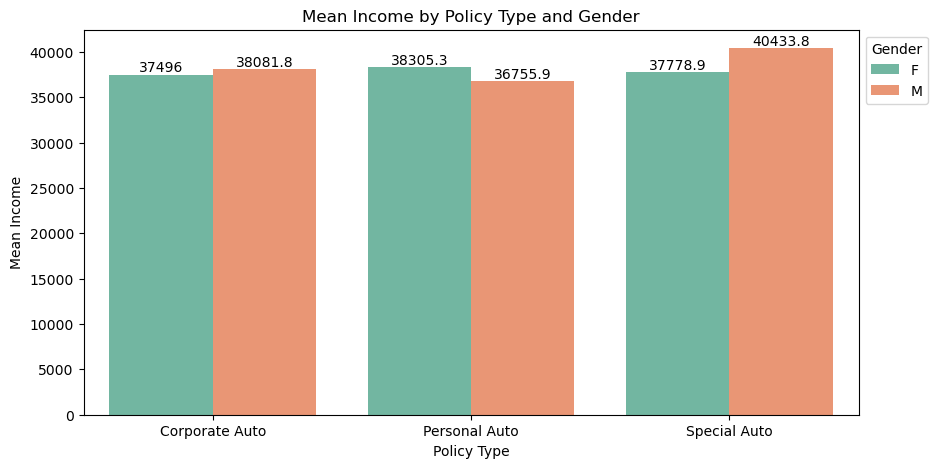

In [57]:
# To determine figure size and subplot
fig, ax = plt.subplots(figsize=(10,5))

# To create a barplot
sns.barplot(x='Policy Type', y='Income', hue='Gender', data=df, palette='Set2', errorbar=None)
plt.title('Mean Income by Policy Type and Gender')
plt.xlabel('Policy Type')
plt.ylabel('Mean Income')
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

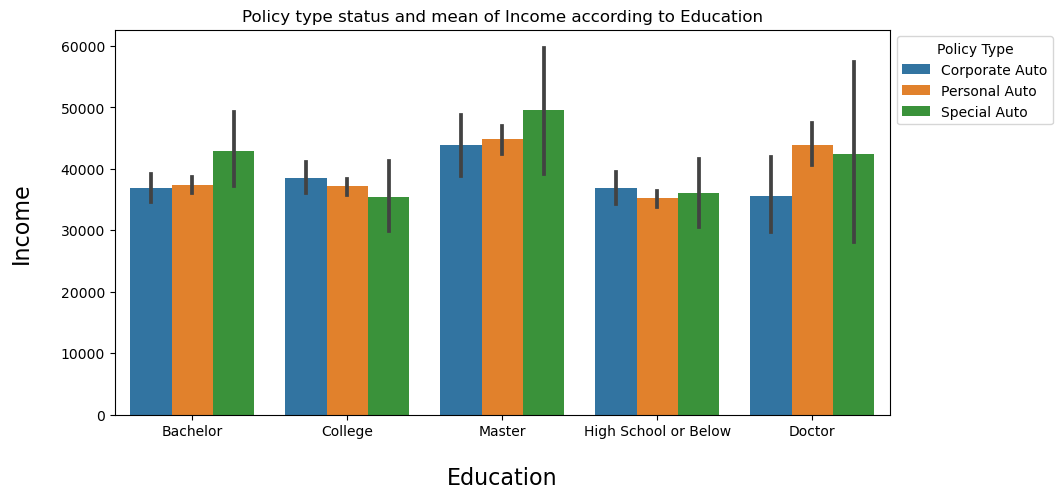

In [58]:
# To determine a figure size
plt.figure(figsize=(10,5))

# To create a barplot
sns.barplot(x='Education', y='Income', hue='Policy Type', data=df)
plt.title('Policy type status and mean of Income according to Education')
plt.xlabel('Education',labelpad=20, fontsize=16)
plt.ylabel('Income', labelpad=20, fontsize=16)
plt.legend(title='Policy Type', bbox_to_anchor=(1, 1))
plt.show()

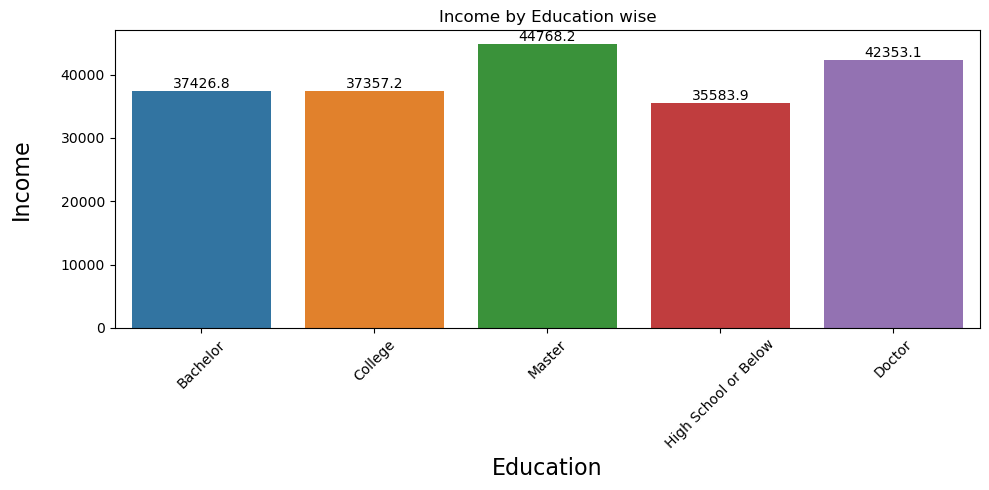

In [59]:
# To determine a figure size
fig, ax = plt.subplots(figsize=(10,5))

# To create a barplot
sns.barplot(df, x="Education", y="Income", errorbar=None)
plt.title("Income by Education wise")
plt.xlabel('Education',fontsize=16)
plt.ylabel('Income',labelpad=20, fontsize=16)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

In [60]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024366   
Income                                        0.024366  1.000000   
Monthly Premium Auto                          0.396262 -0.016665   
Months Since Last Claim                       0.011517 -0.026715   
Months Since Policy Inception                 0.009418 -0.000875   
Number of Open Complaints                    -0.036343  0.006408   
Number of Policies                            0.021955 -0.008656   
Total Claim Amount                            0.226451 -0.355254   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396262                 0.011517   
Income                                    -0.016665                -0.026715   
Monthly Premium Auto                       1.000000                 0.005026   
Months Since Last Claim                    0.005026                 1.000000   
Months Since Policy Inception              0.020257                -0.042959   
Number of Open Complaints                 -0.013122                 0.005354   
Number of Policies                        -0.011233                 0.009136   
Total Claim Amount                         0.632017                 0.007563   

                               Months Since Policy Inception  \
Customer Lifetime Value                             0.009418   
Income                                             -0.000875   
Monthly Premium Auto                                0.020257   
Months Since Last Claim                            -0.042959   
Months Since Policy Inception                       1.000000   
Number of Open Complaints                          -0.001158   
Number of Policies                                 -0.013333   
Total Claim Amount                                  0.003335   

                               Number of Open Complaints  Number of Policies  \
Customer Lifetime Value                        -0.036343            0.021955   
Income                                          0.006408           -0.008656   
Monthly Premium Auto                           -0.013122           -0.011233   
Months Since Last Claim                         0.005354            0.009136   
Months Since Policy Inception                  -0.001158           -0.013333   
Number of Open Complaints                       1.000000            0.001498   
Number of Policies                              0.001498            1.000000   
Total Claim Amount                             -0.014241           -0.002354   

                               Total Claim Amount  
Customer Lifetime Value                  0.226451  
Income                                  -0.355254  
Monthly Premium Auto                     0.632017  
Months Since Last Claim                  0.007563  
Months Since Policy Inception            0.003335  
Number of Open Complaints               -0.014241  
Number of Policies                      -0.002354  
Total Claim Amount                       1.000000

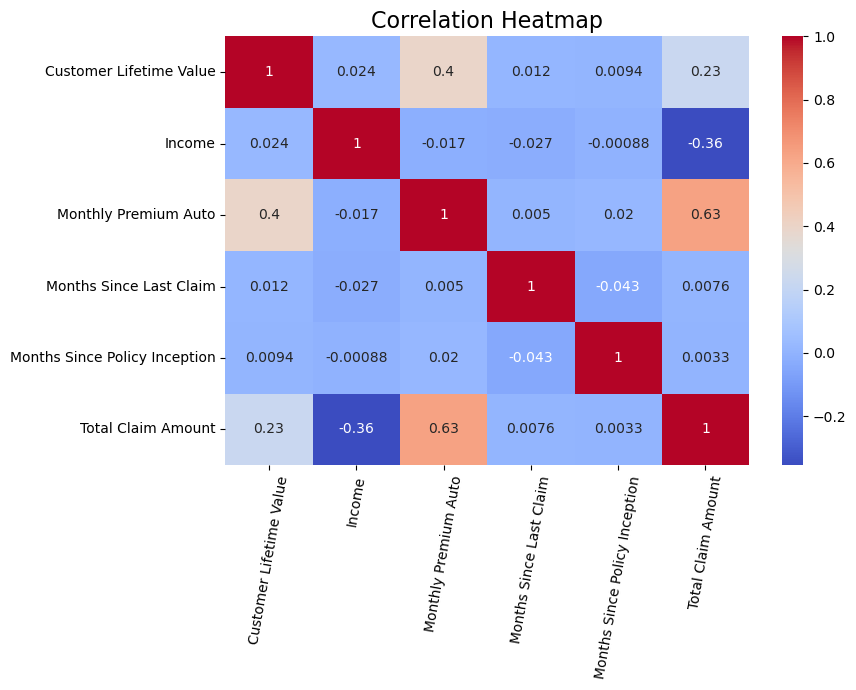

In [61]:
numerical_cols = df.select_dtypes(include=["float64", "int64"])
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"], axis=1)

# To determine the figure size
plt.figure(figsize=(9, 7))

# To create a Correlation Heatmap
sns.heatmap(numerical_cols.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Relationship between CLV vs Monthly Premium Auto')

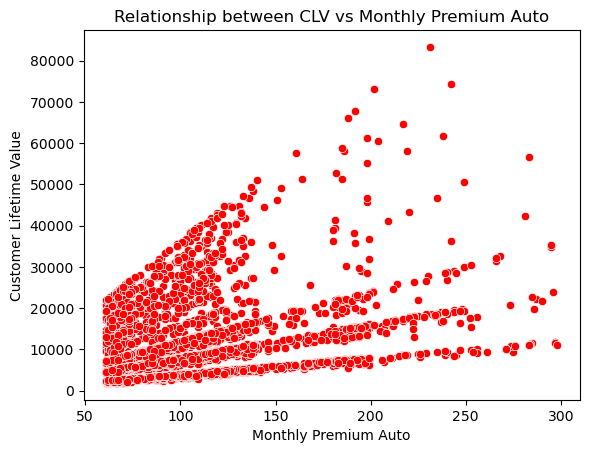

In [62]:
sns.scatterplot(df, x="Monthly Premium Auto", y="Customer Lifetime Value", color='r')
plt.title("Relationship between CLV vs Monthly Premium Auto")

Text(0.5, 1.0, 'Relationship between Monthly Premium Auto vs Total Claim Amount')

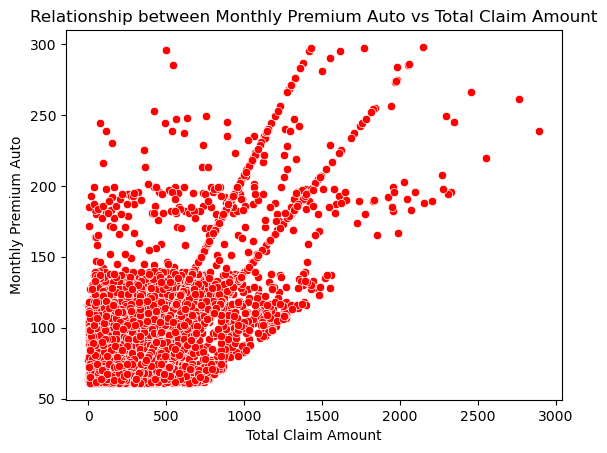

In [63]:
sns.scatterplot(df, x="Total Claim Amount", y="Monthly Premium Auto", color='r')
plt.title("Relationship between Monthly Premium Auto vs Total Claim Amount")

Text(0.5, 1.0, 'Relationship between Total Claim Amount vs CLV')

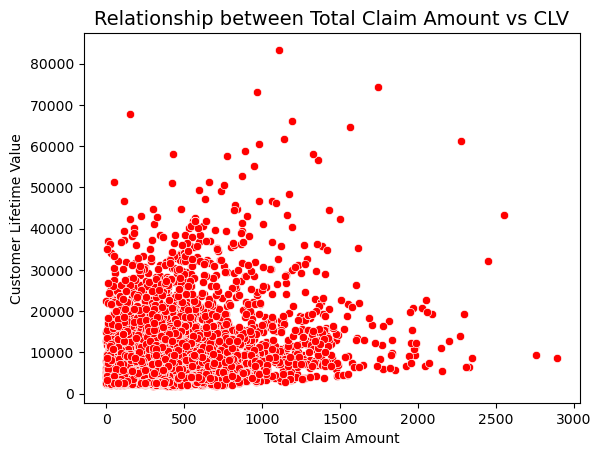

In [64]:
sns.scatterplot(df, x="Total Claim Amount", y="Customer Lifetime Value", color='r')
plt.title("Relationship between Total Claim Amount vs CLV", fontsize=14)

In [65]:
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4          3/2/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

# Model Building

In [66]:
df_new = df.drop("Customer", axis=1)

# Convert the 'Effective To Date' column to datetime format
df_new['Effective To Date'] = pd.to_datetime(df_new['Effective To Date'])

# Convert the reference date to numpy datetime64
ref_date = np.datetime64('2022-01-01')

# Convert the 'Effective To Date' column to the number of days since the reference date
df_new['Effective To Date'] = (df_new['Effective To Date'] - ref_date).astype(np.int64)

In [67]:
# Get the categorical columns
categorical_cols = df_new.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [68]:
# one-hot encoding to categorical variables
df_new = pd.get_dummies(df_new, columns=categorical_cols,drop_first=True)

In [69]:
df_new.head()

Customer Lifetime Value   Effective To Date  Income  Monthly Premium Auto  \
0              2763.519279 -342489600000000000   56274                    69   
1              6979.535903 -344563200000000000       0                    94   
2             12887.431650 -342921600000000000   48767                   108   
3              7645.861827 -345513600000000000       0                   106   
4              2813.692575 -341971200000000000   43836                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Total Claim Amount  \
0                          0                   1          384.811147   
1                          0                   8         1131.464935   
2                          0                   2          566.472247   
3                          0                   7          529.881344   
4                          0                   1          138.130879   

   State_California  State_Nevada  State_Oregon  State_Washington  \
0             False         False         False              True   
1             False         False         False             False   
2             False          True         False             False   
3              True         False         False             False   
4             False         False         False              True   

   Response_Yes  Coverage_Extended  Coverage_Premium  Education_College  \
0         False              False             False              False   
1         False               True             False              False   
2         False              False              True              False   
3         False              False             False              False   
4         False              False             False              False   

   Education_Doctor  Education_High School or Below  Education_Master  \
0             False                           False             False   
1             False                           False             False   
2             False                           False             False   
3             False                           False             False   
4             False                           False             False   

   EmploymentStatus_Employed  EmploymentStatus_Medical Leave  \
0                       True                           False   
1                      False                           False   
2                       True                           False   
3                      False                           False   
4                       True                           False   

   EmploymentStatus_Retired  EmploymentStatus_Unemployed  Gender_M  \
0                     False                        False     False   
1                     False                         True     False   
2                     False                        False     False   
3                     False                         True      True   
4                     False                        False      True   

   Location Code_Suburban  Location Code_Urban  Marital Status_Married  \
0                    True                False                    True   
1                    True                False                   False   
2                    True                False                    True   
3                    True                False                    True   
4                   False                False                   False   

   Marital Status_Single  Policy Type_Personal Auto  Policy Type_Special Auto  \
0                  False                      False                     False   
1   

In [70]:
x = df_new.drop(['Customer Lifetime Value'],axis=1)
y = df_new['Customer Lifetime Value']

# Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [73]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [74]:
# Model Score for Train data
lm.score(x_train,y_train)

0.16071475619440045

In [75]:
# Model Score for Test data
lm.score(x_test,y_test)

0.1531031732470236

# Decision Tree Regression

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# Train a Decision Tree Regression model
dt_reg = DecisionTreeRegressor(max_depth=50, min_samples_leaf=20, random_state=101)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=50, min_samples_leaf=20, random_state=101)

In [78]:
dt_reg.score(x_train,y_train)

0.7545750492710576

In [79]:
dt_reg.score(x_test,y_test)

0.6330111310916984

In [80]:
# Make predictions on the testing set
y_pred = dt_reg.predict(x_test)
y_pred

array([2604.11765438, 8433.36864624, 5483.61034285, ..., 2713.32889154,
       4959.50371671, 3319.61767115])

In [81]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MSE: 17348048.23
R2: 0.63


In [82]:
# Tune the hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 5, 7], 'min_samples_leaf': [5, 10, 15]}
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.2f}')

Best parameters: {'max_depth': 5, 'min_samples_leaf': 5}
Best score: -16136607.64


# Random Forest regressor

Creating and Training the Model

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf_regressor = RandomForestRegressor(max_depth=110)

In [86]:
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=110)

In [88]:
# Model score for Training data
rf_regressor.score(x_train,y_train)

0.9589329159256985

In [89]:
# Model score for Test data
rf_regressor.score(x_test,y_test)

0.6926441537008019

In [90]:
r2_score(y_test,y_pred)

0.6330111310916984

# Prediction from our Model

In [91]:
# This is basically a test data
x_test

Effective To Date  Income  Monthly Premium Auto  \
5704 -331430400000000000   39278                    66   
3902 -323568000000000000   79153                   106   
4703 -328752000000000000   25226                    71   
7992 -347068800000000000   45776                    89   
6840 -345600000000000000       0                   105   
8011 -331516800000000000   39248                    87   
8000 -345254400000000000   25927                   103   
1729 -323568000000000000   99845                   110   
4018 -344908800000000000   37478                   105   
4401 -343008000000000000       0                    68   
5692 -342921600000000000   76549                   132   
7877 -320803200000000000   62566                    65   
5539 -328838400000000000   23843                    79   
3710 -343353600000000000   60462                    68   
5216 -326073600000000000       0                   238   
3572 -345600000000000000   66839                   154   
3333 -320889600000000000   44856                    66   
5440 -334108800000000000   68787                    66   
5197 -328752000000000000   43640                    64   
3264 -342230400000000000   27778                   109   
3980 -342403200000000000   98912                   135   
594  -344390400000000000       0                   106   
1421 -344563200000000000   38713                    66   
5104 -345168000000000000   56070                    74   
5207 -342921600000000000       0                   101   
5863 -334108800000000000   69011                    70   
6446 -342921600000000000   30825                    68   
6467 -323568000000000000       0                    65   
6190 -323568000000000000       0                    99   
6136 -343094400000000000   19614                    85   
3968 -343353600000000000   76157                   116   
6117 -334108800000000000   25676                   113   
8722 -343180800000000000   24392                    93   
5261 -346032000000000000   16370                    74   
7382 -334022400000000000       0                    63   
7870 -345600000000000000   27514                   197   
6317 -344995200000000000   74215                    64   
3339 -323481600000000000   15505                    68   
3543 -345600000000000000   51125                    67   
116  -343008000000000000   20993                   133   
1145 -345081600000000000       0                   134   
1509 -331516800000000000   89382                   112   
5324 -328752000000000000   40135                    80   
3025 -345427200000000000   50648                    69   
6857 -339292800000000000   20705                   171   
4451 -344390400000000000       0                   124   
3823 -323481600000000000   75648                   108   
3958 -342230400000000000   33157                   124   
4358 -343008000000000000   72309                    68   
2889 -328752000000000000   39913                   106   
1090 -343180800000000000   44817                    83   
7704 -326160000000000000   42790                    87   
4694 -339292800000000000       0                   132   
5465 -334022400000000000       0                    68   
1318 -345168000000000000   20976                   129   
6595 -343440000000000000   60087                    74   
4974 -336700800000000000   76276                    86   
4152 -345427200000000000       0                    97   
1997 -342144000000000000   77601                    71   
1128 -343008000000000000   55588                   114   
5594 -326073600000000000   31562                    66   
6370 -344649600000000000   59038                   105   
2472 -342489600000000000   40635                   102   
5552 -345081600000000000   91123                   138   
7827 -345513600000000000   34695                   113   
7242 -345168000000000000   67276                    61   
2962 -342230400000000000   39660                   107   
6341 -343008000000000000   24031                   109   
8975 

In [92]:
# This is actual data
y_test

5704     2620.903729
3902     8500.909417
4703     5090.448750
7992    10569.625470
6840     3945.588049
8011     3450.328786
8000     3933.813993
1729     8819.018934
4018     4171.187150
4401     2434.085810
5692    10507.501440
7877     2598.061204
5539     6120.185345
3710     2697.328799
5216    16793.972800
3572     5989.773931
3333    10148.419730
5440     2674.075510
5197     4921.325084
3264    12904.943360
3980    16553.234220
594      8236.917193
1421     4834.710493
5104    20498.831240
5207     3123.080994
5863     8274.145703
6446     2609.877842
6467     6305.925101
6190     3687.169374
6136    16301.967600
3968     4669.226640
6117     4373.358260
8722    10387.245990
5261     8467.267232
7382     2241.108638
7870    15613.951730
6317     2577.319607
3339    21480.817810
3543     7957.630101
116      4772.943848
1145     4735.184474
1509     9036.657561
5324     3208.919835
3025     5531.627731
6857    13115.407510
4451    13357.445440
3823     4349.308750
3958     9988

In [93]:
y_pred = rf_regressor.predict(x_test)

np.set_printoptions(threshold=np.inf)

# This is the value which the model is predicting
print(y_pred)

[ 2604.89207314  8450.40469459  5391.47018341 15635.59303816
  3738.11710997  3435.8473803   3939.42219095  8817.67690832
  4079.00515551  2550.03471017 10486.4367299   2579.81894797
  6032.96631614  2723.77791063 16968.1189311   6002.55630986
 11273.68325334  2639.93446023  5030.76488179 17072.2612039
 22930.3183808   7749.17828708  4837.49207713 11891.60632449
  3119.62263803 11768.85662232  2670.87863652 10512.72798832
  3607.71344435 16344.9236123   4669.1206968   4240.27418516
 12734.39561975 13904.10936433  2220.35205626 15503.1701264
  2557.55589989 14155.28355885 10610.70201141  4775.43135157
  4814.19858218  8986.05400958  3195.2127055   5525.38688258
 13234.1887289  21241.6109432   4347.64036857  9829.99666555
 11196.72581635  4198.61306307 11690.61259913  6903.98693109
  9427.439624   10936.78916495  4962.0531992   5845.87843152
 15019.31806027  6991.07532164  5709.88801283 20093.1881964
  4931.21707287  4172.1368797   8101.71814724 10771.88162535
  8887.95249058 11766.70617

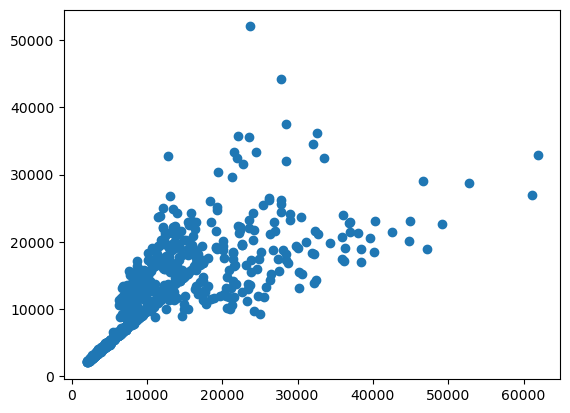

In [94]:
plt.scatter(y_test,y_pred)

# Residual Histogram

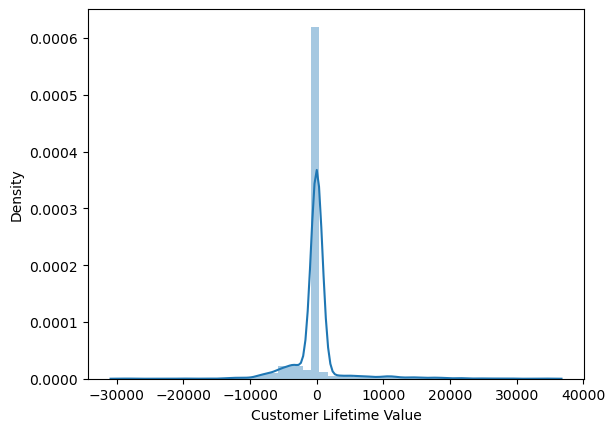

In [95]:
sns.distplot((y_test-y_pred),bins=50);

# Conclusion

Random Forest regressor is the best model that reflects good score as compared to other models and also (y_pred)prediction values are almost near by to the actual values.